In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/datasets/debshuvrasarkar/bakkhali-weather-dataset/Bakkhali_weather_dataset.csv


In [11]:
path='/kaggle/input/datasets/debshuvrasarkar/bakkhali-weather-dataset/Bakkhali_weather_dataset.csv'

In [12]:
df=pd.read_csv(path)

In [13]:
df.head()

,Unnamed: 0,Datetime,hour,day,month,year,Pressure(kPa,Wind_Speed(m/s),Temperature(°C),Radiation(W/m^2),Cloud_Coverage(%),Rain(mm/hour),Relative_Humidity(%),wind_lag1,wind_lag3,wind_lag24
0,0,2019-01-01 00:00:00,0,1,1,2019,101.82,4.26,17.56,0.0,1.39,0.0,71.43,NaN,NaN,NaN
1,1,2019-01-01 01:00:00,1,1,1,2019,101.81,4.40,17.11,0.0,2.08,0.0,73.89,4.26,NaN,NaN
2,2,2019-01-01 02:00:00,2,1,1,2019,101.80,4.67,16.61,0.0,2.78,0.0,76.95,4.40,NaN,NaN
3,3,2019-01-01 03:00:00,3,1,1,2019,101.79,5.05,16.10,0.0,3.47,0.0,79.93,4.67,4.26,NaN
4,4,2019-01-01 04:00:00,4,1,1,2019,101.80,5.31,15.58,0.0,6.27,0.0,82.74,5.05,4.40,NaN


In [14]:
df.describe()

,Unnamed: 0,hour,day,month,year,Pressure(kPa,Wind_Speed(m/s),Temperature(°C),Radiation(W/m^2),Cloud_Coverage(%),Rain(mm/hour),Relative_Humidity(%),wind_lag1,wind_lag3,wind_lag24
count,62424.000000,62424.000000,62424.000000,62424.000000,62424.000000,62424.000000,62424.000000,62424.000000,61656.000000,61656.000000,62424.000000,62424.000000,62422.000000,62418.000000,62376.000000
mean,30173.363899,11.500000,15.690504,6.434064,2022.067666,100.841087,4.733998,26.751104,184.943934,48.787822,6.851854,77.282182,4.734051,4.734126,4.733027
std,17990.472650,6.922242,8.806019,3.485867,2.049021,0.607441,2.363649,3.709337,258.945613,40.127605,20.069279,11.392925,2.363667,2.363722,2.361714
min,0.000000,0.000000,1.000000,1.000000,2019.000000,97.460000,0.000000,11.800000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000
25%,14549.750000,5.750000,8.000000,3.000000,2020.000000,100.360000,3.070000,24.340000,0.000000,7.040000,0.000000,70.400000,3.070000,3.070000,3.070000
50%,30155.500000,11.500000,16.000000,6.000000,2022.000000,100.870000,4.450000,28.380000,5.825000,42.230000,0.730000,81.120000,4.450000,4.450000,4.450000
75%,45761.250000,17.250000,23.000000,9.000000,2024.000000,101.350000,6.050000,29.380000,348.627500,96.190000,6.490000,85.750000,6.050000,6.050000,6.050000
max,61367.000000,23.000000,31.000000,12.000000,2026.000000,102.240000,22.360000,36.040000,998.380000,100.000000,722.460000,99.520000,22.360000,22.360000,22.360000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62424 entries, 0 to 62423
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            62424 non-null  int64  
 1   Datetime              62424 non-null  object 
 2   hour                  62424 non-null  int64  
 3   day                   62424 non-null  int64  
 4   month                 62424 non-null  int64  
 5   year                  62424 non-null  int64  
 6   Pressure(kPa          62424 non-null  float64
 7   Wind_Speed(m/s)       62424 non-null  float64
 8   Temperature(°C)       62424 non-null  float64
 9   Radiation(W/m^2)      61656 non-null  float64
 10  Cloud_Coverage(%)     61656 non-null  float64
 11  Rain(mm/hour)         62424 non-null  float64
 12  Relative_Humidity(%)  62424 non-null  float64
 13  wind_lag1             62422 non-null  float64
 14  wind_lag3             62418 non-null  float64
 15  wind_lag24         

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor




In [18]:
df["Datetime"] = pd.to_datetime(df["Datetime"])
df = df.sort_values("Datetime").reset_index(drop=True)
df.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")

In [19]:
df.head()

,Datetime,hour,day,month,year,Pressure(kPa,Wind_Speed(m/s),Temperature(°C),Radiation(W/m^2),Cloud_Coverage(%),Rain(mm/hour),Relative_Humidity(%),wind_lag1,wind_lag3,wind_lag24
0,2019-01-01 00:00:00,0,1,1,2019,101.82,4.26,17.56,0.0,1.39,0.0,71.43,NaN,NaN,NaN
1,2019-01-01 01:00:00,1,1,1,2019,101.81,4.40,17.11,0.0,2.08,0.0,73.89,4.26,NaN,NaN
2,2019-01-01 02:00:00,2,1,1,2019,101.80,4.67,16.61,0.0,2.78,0.0,76.95,4.40,NaN,NaN
3,2019-01-01 03:00:00,3,1,1,2019,101.79,5.05,16.10,0.0,3.47,0.0,79.93,4.67,4.26,NaN
4,2019-01-01 04:00:00,4,1,1,2019,101.80,5.31,15.58,0.0,6.27,0.0,82.74,5.05,4.40,NaN


In [20]:

df["hour_sin"] = np.sin(2*np.pi*df["hour"]/24)
df["hour_cos"] = np.cos(2*np.pi*df["hour"]/24)


df["month_sin"] = np.sin(2*np.pi*df["month"]/12)
df["month_cos"] = np.cos(2*np.pi*df["month"]/12)


df["day_sin"] = np.sin(2*np.pi*df["day"]/31)
df["day_cos"] = np.cos(2*np.pi*df["day"]/31)


In [21]:
df.head()

,Datetime,hour,day,month,year,Pressure(kPa,Wind_Speed(m/s),Temperature(°C),Radiation(W/m^2),Cloud_Coverage(%),...,Relative_Humidity(%),wind_lag1,wind_lag3,wind_lag24,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
0,2019-01-01 00:00:00,0,1,1,2019,101.82,4.26,17.56,0.0,1.39,...,71.43,NaN,NaN,NaN,0.000000,1.000000,0.5,0.866025,0.201299,0.97953
1,2019-01-01 01:00:00,1,1,1,2019,101.81,4.40,17.11,0.0,2.08,...,73.89,4.26,NaN,NaN,0.258819,0.965926,0.5,0.866025,0.201299,0.97953
2,2019-01-01 02:00:00,2,1,1,2019,101.80,4.67,16.61,0.0,2.78,...,76.95,4.40,NaN,NaN,0.500000,0.866025,0.5,0.866025,0.201299,0.97953
3,2019-01-01 03:00:00,3,1,1,2019,101.79,5.05,16.10,0.0,3.47,...,79.93,4.67,4.26,NaN,0.707107,0.707107,0.5,0.866025,0.201299,0.97953
4,2019-01-01 04:00:00,4,1,1,2019,101.80,5.31,15.58,0.0,6.27,...,82.74,5.05,4.40,NaN,0.866025,0.500000,0.5,0.866025,0.201299,0.97953


In [22]:
df[df["Radiation(W/m^2)"]>0].value_counts

<bound method DataFrame.value_counts of                  Datetime  hour  day  month  year  Pressure(kPa  \
7     2019-01-01 07:00:00     7    1      1  2019        102.05   
8     2019-01-01 08:00:00     8    1      1  2019        102.12   
9     2019-01-01 09:00:00     9    1      1  2019        102.13   
10    2019-01-01 10:00:00    10    1      1  2019        102.08   
11    2019-01-01 11:00:00    11    1      1  2019        101.99   
...                   ...   ...  ...    ...   ...           ...   
62413 2026-02-13 13:00:00    13   13      2  2026        101.37   
62414 2026-02-13 14:00:00    14   13      2  2026        101.30   
62415 2026-02-13 15:00:00    15   13      2  2026        101.27   
62416 2026-02-13 16:00:00    16   13      2  2026        101.27   
62417 2026-02-13 17:00:00    17   13      2  2026        101.27   

       Wind_Speed(m/s)  Temperature(°C)  Radiation(W/m^2)  Cloud_Coverage(%)  \
7                 5.59            14.81             94.97              10.1

In [23]:
df.set_index("Datetime", inplace=True)


df["Radiation(W/m^2)"] = df["Radiation(W/m^2)"].interpolate("time")
df["Cloud_Coverage(%)"] = df["Cloud_Coverage(%)"].interpolate("time")


df["Radiation(W/m^2)"] = df.groupby(df.index.hour)["Radiation(W/m^2)"].transform(
    lambda x: x.fillna(x.mean())
)

df["Cloud_Coverage(%)"] = df.groupby(df.index.hour)["Cloud_Coverage(%)"].transform(
    lambda x: x.fillna(x.mean())
)


df["Radiation(W/m^2)"] = df["Radiation(W/m^2)"].ffill().bfill()
df["Cloud_Coverage(%)"] = df["Cloud_Coverage(%)"].ffill().bfill()

df.reset_index(inplace=True)

In [24]:
df.head()

,Datetime,hour,day,month,year,Pressure(kPa,Wind_Speed(m/s),Temperature(°C),Radiation(W/m^2),Cloud_Coverage(%),...,Relative_Humidity(%),wind_lag1,wind_lag3,wind_lag24,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
0,2019-01-01 00:00:00,0,1,1,2019,101.82,4.26,17.56,0.0,1.39,...,71.43,NaN,NaN,NaN,0.000000,1.000000,0.5,0.866025,0.201299,0.97953
1,2019-01-01 01:00:00,1,1,1,2019,101.81,4.40,17.11,0.0,2.08,...,73.89,4.26,NaN,NaN,0.258819,0.965926,0.5,0.866025,0.201299,0.97953
2,2019-01-01 02:00:00,2,1,1,2019,101.80,4.67,16.61,0.0,2.78,...,76.95,4.40,NaN,NaN,0.500000,0.866025,0.5,0.866025,0.201299,0.97953
3,2019-01-01 03:00:00,3,1,1,2019,101.79,5.05,16.10,0.0,3.47,...,79.93,4.67,4.26,NaN,0.707107,0.707107,0.5,0.866025,0.201299,0.97953
4,2019-01-01 04:00:00,4,1,1,2019,101.80,5.31,15.58,0.0,6.27,...,82.74,5.05,4.40,NaN,0.866025,0.500000,0.5,0.866025,0.201299,0.97953


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62424 entries, 0 to 62423
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Datetime              62424 non-null  datetime64[ns]
 1   hour                  62424 non-null  int64         
 2   day                   62424 non-null  int64         
 3   month                 62424 non-null  int64         
 4   year                  62424 non-null  int64         
 5   Pressure(kPa          62424 non-null  float64       
 6   Wind_Speed(m/s)       62424 non-null  float64       
 7   Temperature(°C)       62424 non-null  float64       
 8   Radiation(W/m^2)      62424 non-null  float64       
 9   Cloud_Coverage(%)     62424 non-null  float64       
 10  Rain(mm/hour)         62424 non-null  float64       
 11  Relative_Humidity(%)  62424 non-null  float64       
 12  wind_lag1             62422 non-null  float64       
 13  wind_lag3       

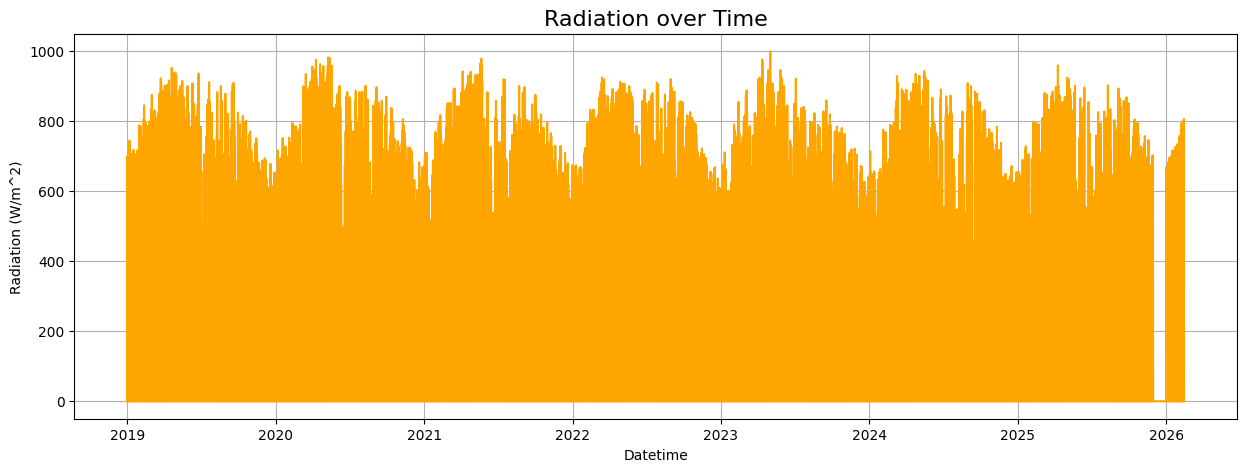

In [26]:
plt.figure(figsize=(15,5))
plt.plot(df["Datetime"], df["Radiation(W/m^2)"], color="orange")
plt.title("Radiation over Time", fontsize=16)
plt.xlabel("Datetime")
plt.ylabel("Radiation (W/m^2)")
plt.grid(True)
plt.show()

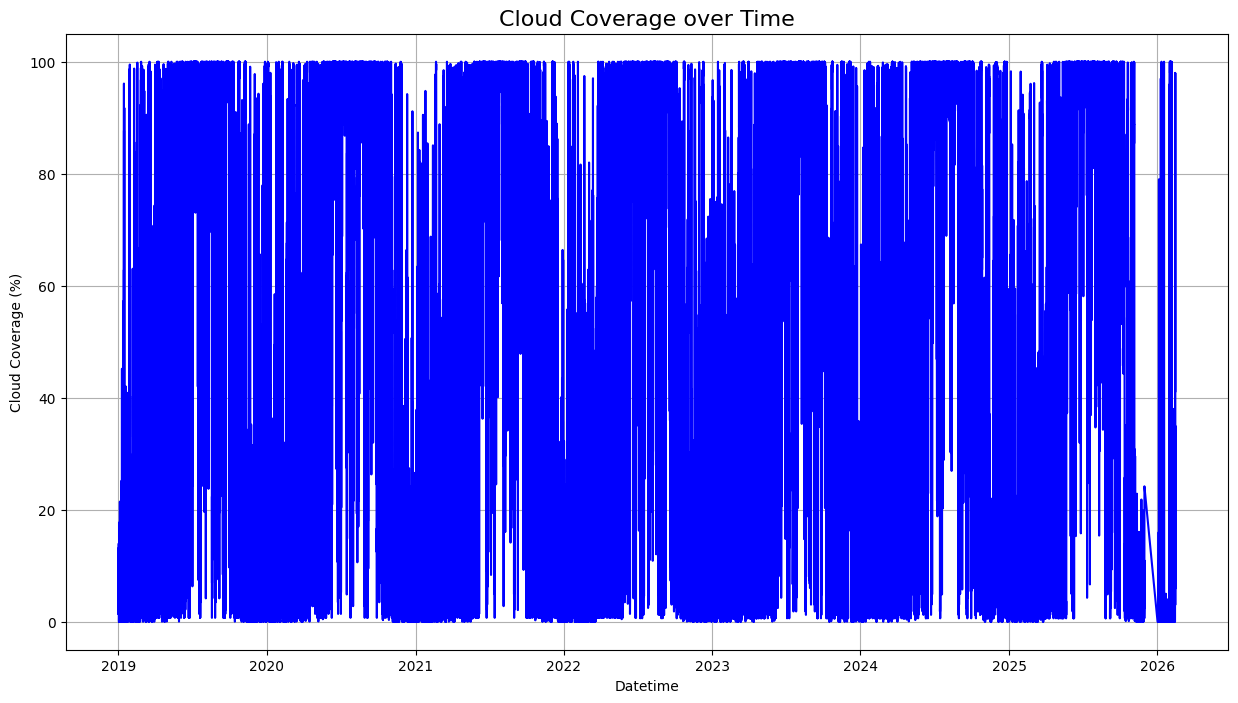

In [27]:
plt.figure(figsize=(15,8))
plt.plot(df["Datetime"], df["Cloud_Coverage(%)"], color="blue")
plt.title("Cloud Coverage over Time", fontsize=16)
plt.xlabel("Datetime")
plt.ylabel("Cloud Coverage (%)")
plt.grid(True)
plt.show()

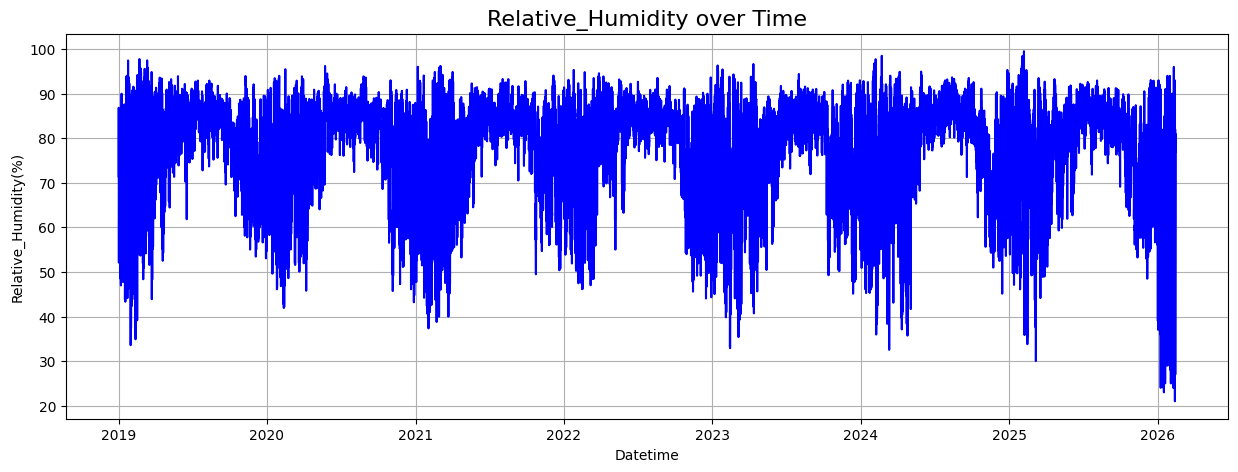

In [28]:
plt.figure(figsize=(15,5))
plt.plot(df["Datetime"], df["Relative_Humidity(%)"], color="blue")
plt.title("Relative_Humidity over Time", fontsize=16)
plt.xlabel("Datetime")
plt.ylabel("Relative_Humidity(%)")
plt.grid(True)
plt.show()

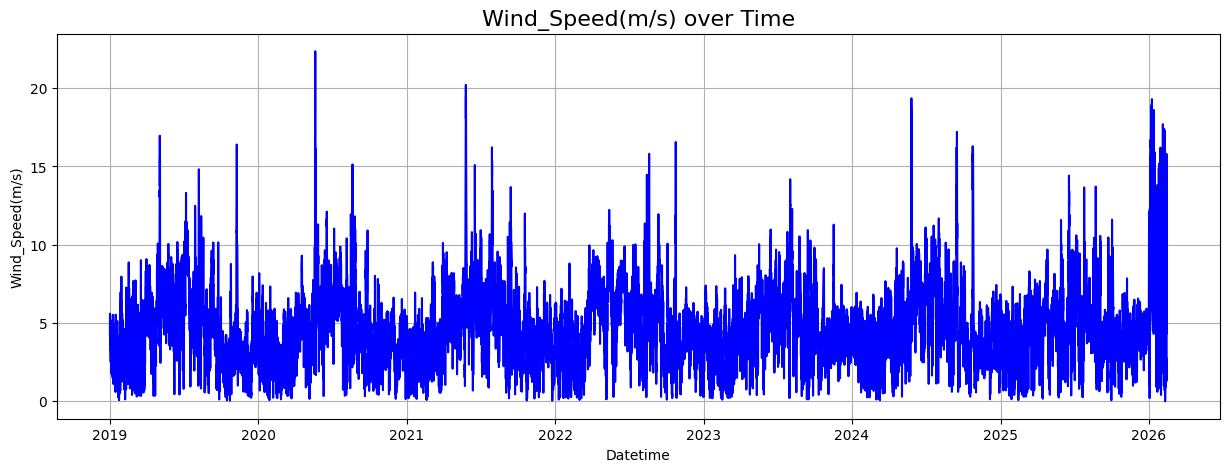

In [29]:
plt.figure(figsize=(15,5))
plt.plot(df["Datetime"], df["Wind_Speed(m/s)"], color="blue")
plt.title("Wind_Speed(m/s) over Time", fontsize=16)
plt.xlabel("Datetime")
plt.ylabel("Wind_Speed(m/s)")
plt.grid(True)
plt.show()

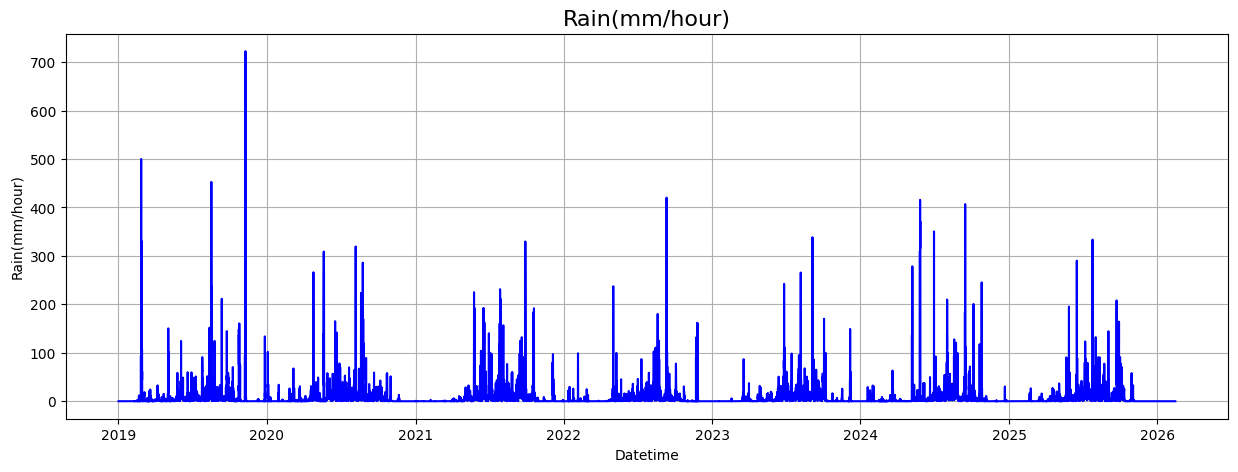

In [30]:
plt.figure(figsize=(15,5))
plt.plot(df["Datetime"], df["Rain(mm/hour)"], color="blue")
plt.title("Rain(mm/hour)", fontsize=16)
plt.xlabel("Datetime")
plt.ylabel("Rain(mm/hour)")
plt.grid(True)
plt.show()

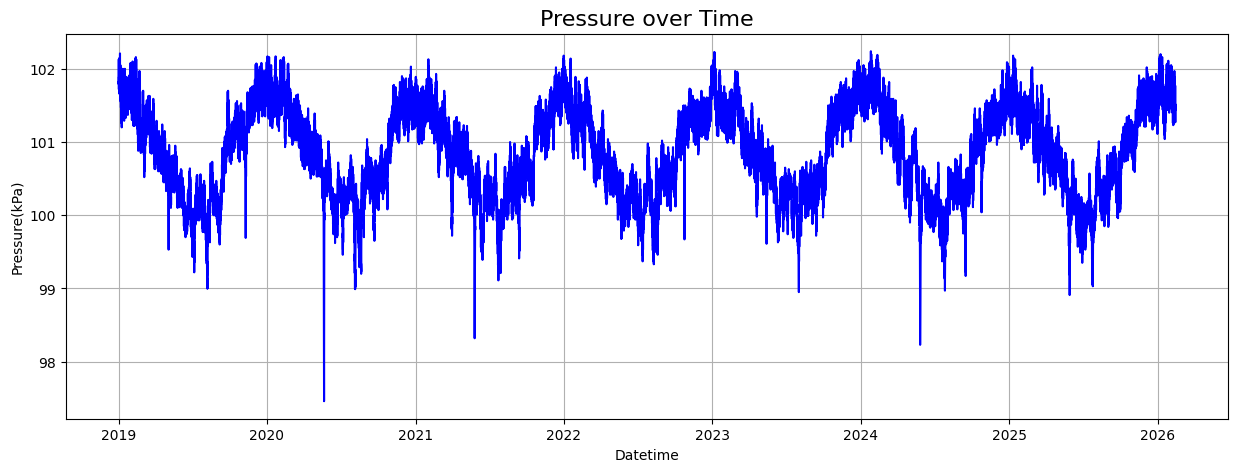

In [31]:
plt.figure(figsize=(15,5))
plt.plot(df["Datetime"], df["Pressure(kPa"], color="blue")
plt.title("Pressure over Time", fontsize=16)
plt.xlabel("Datetime")
plt.ylabel("Pressure(kPa)")
plt.grid(True)
plt.show()

In [32]:
df.drop(columns=["wind_lag1", "wind_lag3","wind_lag24"], inplace=True)

In [33]:
lag_features = [
    "Temperature(°C)",
    "Radiation(W/m^2)",
    "Cloud_Coverage(%)",
    "Rain(mm/hour)",
    "Relative_Humidity(%)",
    "Pressure(kPa",
    "Wind_Speed(m/s)"
]

lags = [1,2,3,6,12,24]

for feature in lag_features:
    for lag in lags:
        df[f"{feature}_lag{lag}"] = df[feature].shift(lag)

In [34]:
df.head()

,Datetime,hour,day,month,year,Pressure(kPa,Wind_Speed(m/s),Temperature(°C),Radiation(W/m^2),Cloud_Coverage(%),...,Pressure(kPa_lag3,Pressure(kPa_lag6,Pressure(kPa_lag12,Pressure(kPa_lag24,Wind_Speed(m/s)_lag1,Wind_Speed(m/s)_lag2,Wind_Speed(m/s)_lag3,Wind_Speed(m/s)_lag6,Wind_Speed(m/s)_lag12,Wind_Speed(m/s)_lag24
0,2019-01-01 00:00:00,0,1,1,2019,101.82,4.26,17.56,0.0,1.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01 01:00:00,1,1,1,2019,101.81,4.40,17.11,0.0,2.08,...,NaN,NaN,NaN,NaN,4.26,NaN,NaN,NaN,NaN,NaN
2,2019-01-01 02:00:00,2,1,1,2019,101.80,4.67,16.61,0.0,2.78,...,NaN,NaN,NaN,NaN,4.40,4.26,NaN,NaN,NaN,NaN
3,2019-01-01 03:00:00,3,1,1,2019,101.79,5.05,16.10,0.0,3.47,...,101.82,NaN,NaN,NaN,4.67,4.40,4.26,NaN,NaN,NaN
4,2019-01-01 04:00:00,4,1,1,2019,101.80,5.31,15.58,0.0,6.27,...,101.81,NaN,NaN,NaN,5.05,4.67,4.40,NaN,NaN,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62424 entries, 0 to 62423
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    62424 non-null  datetime64[ns]
 1   hour                        62424 non-null  int64         
 2   day                         62424 non-null  int64         
 3   month                       62424 non-null  int64         
 4   year                        62424 non-null  int64         
 5   Pressure(kPa                62424 non-null  float64       
 6   Wind_Speed(m/s)             62424 non-null  float64       
 7   Temperature(°C)             62424 non-null  float64       
 8   Radiation(W/m^2)            62424 non-null  float64       
 9   Cloud_Coverage(%)           62424 non-null  float64       
 10  Rain(mm/hour)               62424 non-null  float64       
 11  Relative_Humidity(%)        62424 non-null  float64   

In [36]:
new_df=df.dropna()

In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62400 entries, 24 to 62423
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    62400 non-null  datetime64[ns]
 1   hour                        62400 non-null  int64         
 2   day                         62400 non-null  int64         
 3   month                       62400 non-null  int64         
 4   year                        62400 non-null  int64         
 5   Pressure(kPa                62400 non-null  float64       
 6   Wind_Speed(m/s)             62400 non-null  float64       
 7   Temperature(°C)             62400 non-null  float64       
 8   Radiation(W/m^2)            62400 non-null  float64       
 9   Cloud_Coverage(%)           62400 non-null  float64       
 10  Rain(mm/hour)               62400 non-null  float64       
 11  Relative_Humidity(%)        62400 non-null  float64       

In [38]:
df.dropna()

,Datetime,hour,day,month,year,Pressure(kPa,Wind_Speed(m/s),Temperature(°C),Radiation(W/m^2),Cloud_Coverage(%),...,Pressure(kPa_lag3,Pressure(kPa_lag6,Pressure(kPa_lag12,Pressure(kPa_lag24,Wind_Speed(m/s)_lag1,Wind_Speed(m/s)_lag2,Wind_Speed(m/s)_lag3,Wind_Speed(m/s)_lag6,Wind_Speed(m/s)_lag12,Wind_Speed(m/s)_lag24
24,2019-01-02 00:00:00,0,2,1,2019,101.83,4.51,17.61,0.0,0.00,...,101.86,101.85,101.88,101.82,4.53,4.67,4.87,4.34,4.20,4.26
25,2019-01-02 01:00:00,1,2,1,2019,101.82,4.59,17.21,0.0,0.00,...,101.85,101.89,101.78,101.81,4.51,4.53,4.67,4.82,3.83,4.40
26,2019-01-02 02:00:00,2,2,1,2019,101.82,4.79,16.78,0.0,0.69,...,101.83,101.89,101.73,101.80,4.59,4.51,4.53,4.97,3.63,4.67
27,2019-01-02 03:00:00,3,2,1,2019,101.82,5.06,16.33,0.0,1.39,...,101.83,101.86,101.72,101.79,4.79,4.59,4.51,4.87,3.62,5.05
28,2019-01-02 04:00:00,4,2,1,2019,101.83,5.18,15.83,0.0,1.39,...,101.82,101.85,101.75,101.80,5.06,4.79,4.59,4.67,3.52,5.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62419,2026-02-13 19:00:00,19,13,2,2026,101.42,7.20,22.20,0.0,3.00,...,101.27,101.37,101.68,101.48,5.40,9.70,13.00,15.40,10.00,8.40
62420,2026-02-13 20:00:00,20,13,2,2026,101.47,1.30,21.40,0.0,15.00,...,101.27,101.30,101.73,101.51,7.20,5.40,9.70,15.10,9.30,7.50
62421,2026-02-13 21:00:00,21,13,2,2026,101.51,4.10,20.20,0.0,31.00,...,101.32,101.27,101.77,101.53,1.30,7.20,5.40,14.20,9.70,7.30
62422,2026-02-13 22:00:00,22,13,2,2026,101.48,2.80,19.70,0.0,35.00,...,101.42,101.27,101.70,101.53,4.10,1.30,7.20,13.00,12.80,7.60


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62424 entries, 0 to 62423
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    62424 non-null  datetime64[ns]
 1   hour                        62424 non-null  int64         
 2   day                         62424 non-null  int64         
 3   month                       62424 non-null  int64         
 4   year                        62424 non-null  int64         
 5   Pressure(kPa                62424 non-null  float64       
 6   Wind_Speed(m/s)             62424 non-null  float64       
 7   Temperature(°C)             62424 non-null  float64       
 8   Radiation(W/m^2)            62424 non-null  float64       
 9   Cloud_Coverage(%)           62424 non-null  float64       
 10  Rain(mm/hour)               62424 non-null  float64       
 11  Relative_Humidity(%)        62424 non-null  float64   

In [40]:
df.head()

,Datetime,hour,day,month,year,Pressure(kPa,Wind_Speed(m/s),Temperature(°C),Radiation(W/m^2),Cloud_Coverage(%),...,Pressure(kPa_lag3,Pressure(kPa_lag6,Pressure(kPa_lag12,Pressure(kPa_lag24,Wind_Speed(m/s)_lag1,Wind_Speed(m/s)_lag2,Wind_Speed(m/s)_lag3,Wind_Speed(m/s)_lag6,Wind_Speed(m/s)_lag12,Wind_Speed(m/s)_lag24
0,2019-01-01 00:00:00,0,1,1,2019,101.82,4.26,17.56,0.0,1.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01 01:00:00,1,1,1,2019,101.81,4.40,17.11,0.0,2.08,...,NaN,NaN,NaN,NaN,4.26,NaN,NaN,NaN,NaN,NaN
2,2019-01-01 02:00:00,2,1,1,2019,101.80,4.67,16.61,0.0,2.78,...,NaN,NaN,NaN,NaN,4.40,4.26,NaN,NaN,NaN,NaN
3,2019-01-01 03:00:00,3,1,1,2019,101.79,5.05,16.10,0.0,3.47,...,101.82,NaN,NaN,NaN,4.67,4.40,4.26,NaN,NaN,NaN
4,2019-01-01 04:00:00,4,1,1,2019,101.80,5.31,15.58,0.0,6.27,...,101.81,NaN,NaN,NaN,5.05,4.67,4.40,NaN,NaN,NaN


In [41]:
df.isna().sum()


Datetime                       0
hour                           0
day                            0
month                          0
year                           0
Pressure(kPa                   0
Wind_Speed(m/s)                0
Temperature(°C)                0
Radiation(W/m^2)               0
Cloud_Coverage(%)              0
Rain(mm/hour)                  0
Relative_Humidity(%)           0
hour_sin                       0
hour_cos                       0
month_sin                      0
month_cos                      0
day_sin                        0
day_cos                        0
Temperature(°C)_lag1           1
Temperature(°C)_lag2           2
Temperature(°C)_lag3           3
Temperature(°C)_lag6           6
Temperature(°C)_lag12         12
Temperature(°C)_lag24         24
Radiation(W/m^2)_lag1          1
Radiation(W/m^2)_lag2          2
Radiation(W/m^2)_lag3          3
Radiation(W/m^2)_lag6          6
Radiation(W/m^2)_lag12        12
Radiation(W/m^2)_lag24        24
Cloud_Cove

In [42]:
new_df.head()

,Datetime,hour,day,month,year,Pressure(kPa,Wind_Speed(m/s),Temperature(°C),Radiation(W/m^2),Cloud_Coverage(%),...,Pressure(kPa_lag3,Pressure(kPa_lag6,Pressure(kPa_lag12,Pressure(kPa_lag24,Wind_Speed(m/s)_lag1,Wind_Speed(m/s)_lag2,Wind_Speed(m/s)_lag3,Wind_Speed(m/s)_lag6,Wind_Speed(m/s)_lag12,Wind_Speed(m/s)_lag24
24,2019-01-02 00:00:00,0,2,1,2019,101.83,4.51,17.61,0.0,0.00,...,101.86,101.85,101.88,101.82,4.53,4.67,4.87,4.34,4.20,4.26
25,2019-01-02 01:00:00,1,2,1,2019,101.82,4.59,17.21,0.0,0.00,...,101.85,101.89,101.78,101.81,4.51,4.53,4.67,4.82,3.83,4.40
26,2019-01-02 02:00:00,2,2,1,2019,101.82,4.79,16.78,0.0,0.69,...,101.83,101.89,101.73,101.80,4.59,4.51,4.53,4.97,3.63,4.67
27,2019-01-02 03:00:00,3,2,1,2019,101.82,5.06,16.33,0.0,1.39,...,101.83,101.86,101.72,101.79,4.79,4.59,4.51,4.87,3.62,5.05
28,2019-01-02 04:00:00,4,2,1,2019,101.83,5.18,15.83,0.0,1.39,...,101.82,101.85,101.75,101.80,5.06,4.79,4.59,4.67,3.52,5.31


In [43]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62400 entries, 24 to 62423
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    62400 non-null  datetime64[ns]
 1   hour                        62400 non-null  int64         
 2   day                         62400 non-null  int64         
 3   month                       62400 non-null  int64         
 4   year                        62400 non-null  int64         
 5   Pressure(kPa                62400 non-null  float64       
 6   Wind_Speed(m/s)             62400 non-null  float64       
 7   Temperature(°C)             62400 non-null  float64       
 8   Radiation(W/m^2)            62400 non-null  float64       
 9   Cloud_Coverage(%)           62400 non-null  float64       
 10  Rain(mm/hour)               62400 non-null  float64       
 11  Relative_Humidity(%)        62400 non-null  float64       

In [44]:
new_df.head()

,Datetime,hour,day,month,year,Pressure(kPa,Wind_Speed(m/s),Temperature(°C),Radiation(W/m^2),Cloud_Coverage(%),...,Pressure(kPa_lag3,Pressure(kPa_lag6,Pressure(kPa_lag12,Pressure(kPa_lag24,Wind_Speed(m/s)_lag1,Wind_Speed(m/s)_lag2,Wind_Speed(m/s)_lag3,Wind_Speed(m/s)_lag6,Wind_Speed(m/s)_lag12,Wind_Speed(m/s)_lag24
24,2019-01-02 00:00:00,0,2,1,2019,101.83,4.51,17.61,0.0,0.00,...,101.86,101.85,101.88,101.82,4.53,4.67,4.87,4.34,4.20,4.26
25,2019-01-02 01:00:00,1,2,1,2019,101.82,4.59,17.21,0.0,0.00,...,101.85,101.89,101.78,101.81,4.51,4.53,4.67,4.82,3.83,4.40
26,2019-01-02 02:00:00,2,2,1,2019,101.82,4.79,16.78,0.0,0.69,...,101.83,101.89,101.73,101.80,4.59,4.51,4.53,4.97,3.63,4.67
27,2019-01-02 03:00:00,3,2,1,2019,101.82,5.06,16.33,0.0,1.39,...,101.83,101.86,101.72,101.79,4.79,4.59,4.51,4.87,3.62,5.05
28,2019-01-02 04:00:00,4,2,1,2019,101.83,5.18,15.83,0.0,1.39,...,101.82,101.85,101.75,101.80,5.06,4.79,4.59,4.67,3.52,5.31


In [45]:
roll_cols = [col for col in new_df.columns if "roll_mean" in col or "roll_std" in col]

new_df = new_df.drop(columns=roll_cols)



In [46]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62400 entries, 24 to 62423
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    62400 non-null  datetime64[ns]
 1   hour                        62400 non-null  int64         
 2   day                         62400 non-null  int64         
 3   month                       62400 non-null  int64         
 4   year                        62400 non-null  int64         
 5   Pressure(kPa                62400 non-null  float64       
 6   Wind_Speed(m/s)             62400 non-null  float64       
 7   Temperature(°C)             62400 non-null  float64       
 8   Radiation(W/m^2)            62400 non-null  float64       
 9   Cloud_Coverage(%)           62400 non-null  float64       
 10  Rain(mm/hour)               62400 non-null  float64       
 11  Relative_Humidity(%)        62400 non-null  float64       

In [47]:
new_df.head()

,Datetime,hour,day,month,year,Pressure(kPa,Wind_Speed(m/s),Temperature(°C),Radiation(W/m^2),Cloud_Coverage(%),...,Pressure(kPa_lag3,Pressure(kPa_lag6,Pressure(kPa_lag12,Pressure(kPa_lag24,Wind_Speed(m/s)_lag1,Wind_Speed(m/s)_lag2,Wind_Speed(m/s)_lag3,Wind_Speed(m/s)_lag6,Wind_Speed(m/s)_lag12,Wind_Speed(m/s)_lag24
24,2019-01-02 00:00:00,0,2,1,2019,101.83,4.51,17.61,0.0,0.00,...,101.86,101.85,101.88,101.82,4.53,4.67,4.87,4.34,4.20,4.26
25,2019-01-02 01:00:00,1,2,1,2019,101.82,4.59,17.21,0.0,0.00,...,101.85,101.89,101.78,101.81,4.51,4.53,4.67,4.82,3.83,4.40
26,2019-01-02 02:00:00,2,2,1,2019,101.82,4.79,16.78,0.0,0.69,...,101.83,101.89,101.73,101.80,4.59,4.51,4.53,4.97,3.63,4.67
27,2019-01-02 03:00:00,3,2,1,2019,101.82,5.06,16.33,0.0,1.39,...,101.83,101.86,101.72,101.79,4.79,4.59,4.51,4.87,3.62,5.05
28,2019-01-02 04:00:00,4,2,1,2019,101.83,5.18,15.83,0.0,1.39,...,101.82,101.85,101.75,101.80,5.06,4.79,4.59,4.67,3.52,5.31


In [48]:
new_df1 = new_df.drop(columns=["Datetime"])

In [49]:
new_df1.head()

,hour,day,month,year,Pressure(kPa,Wind_Speed(m/s),Temperature(°C),Radiation(W/m^2),Cloud_Coverage(%),Rain(mm/hour),...,Pressure(kPa_lag3,Pressure(kPa_lag6,Pressure(kPa_lag12,Pressure(kPa_lag24,Wind_Speed(m/s)_lag1,Wind_Speed(m/s)_lag2,Wind_Speed(m/s)_lag3,Wind_Speed(m/s)_lag6,Wind_Speed(m/s)_lag12,Wind_Speed(m/s)_lag24
24,0,2,1,2019,101.83,4.51,17.61,0.0,0.00,0.0,...,101.86,101.85,101.88,101.82,4.53,4.67,4.87,4.34,4.20,4.26
25,1,2,1,2019,101.82,4.59,17.21,0.0,0.00,0.0,...,101.85,101.89,101.78,101.81,4.51,4.53,4.67,4.82,3.83,4.40
26,2,2,1,2019,101.82,4.79,16.78,0.0,0.69,0.0,...,101.83,101.89,101.73,101.80,4.59,4.51,4.53,4.97,3.63,4.67
27,3,2,1,2019,101.82,5.06,16.33,0.0,1.39,0.0,...,101.83,101.86,101.72,101.79,4.79,4.59,4.51,4.87,3.62,5.05
28,4,2,1,2019,101.83,5.18,15.83,0.0,1.39,0.0,...,101.82,101.85,101.75,101.80,5.06,4.79,4.59,4.67,3.52,5.31


In [50]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62400 entries, 24 to 62423
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hour                        62400 non-null  int64  
 1   day                         62400 non-null  int64  
 2   month                       62400 non-null  int64  
 3   year                        62400 non-null  int64  
 4   Pressure(kPa                62400 non-null  float64
 5   Wind_Speed(m/s)             62400 non-null  float64
 6   Temperature(°C)             62400 non-null  float64
 7   Radiation(W/m^2)            62400 non-null  float64
 8   Cloud_Coverage(%)           62400 non-null  float64
 9   Rain(mm/hour)               62400 non-null  float64
 10  Relative_Humidity(%)        62400 non-null  float64
 11  hour_sin                    62400 non-null  float64
 12  hour_cos                    62400 non-null  float64
 13  month_sin                   62400 n

In [53]:
targets = [
    "Temperature(°C)",
    "Radiation(W/m^2)",
    "Cloud_Coverage(%)",
    "Rain(mm/hour)",
    "Relative_Humidity(%)",
    "Wind_Speed(m/s)",
    "Pressure(kPa"
]

In [54]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62400 entries, 24 to 62423
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hour                        62400 non-null  int64  
 1   day                         62400 non-null  int64  
 2   month                       62400 non-null  int64  
 3   year                        62400 non-null  int64  
 4   Pressure(kPa                62400 non-null  float64
 5   Wind_Speed(m/s)             62400 non-null  float64
 6   Temperature(°C)             62400 non-null  float64
 7   Radiation(W/m^2)            62400 non-null  float64
 8   Cloud_Coverage(%)           62400 non-null  float64
 9   Rain(mm/hour)               62400 non-null  float64
 10  Relative_Humidity(%)        62400 non-null  float64
 11  hour_sin                    62400 non-null  float64
 12  hour_cos                    62400 non-null  float64
 13  month_sin                   62400 n

In [55]:
target_df=new_df1[targets]

In [56]:
target_df

,Temperature(°C),Radiation(W/m^2),Cloud_Coverage(%),Rain(mm/hour),Relative_Humidity(%),Wind_Speed(m/s),Pressure(kPa
24,17.61,0.0,0.00,0.0,70.49,4.51,101.83
25,17.21,0.0,0.00,0.0,72.12,4.59,101.82
26,16.78,0.0,0.69,0.0,74.20,4.79,101.82
27,16.33,0.0,1.39,0.0,76.53,5.06,101.82
28,15.83,0.0,1.39,0.0,78.93,5.18,101.83
...,...,...,...,...,...,...,...
62419,22.20,0.0,3.00,0.0,54.00,7.20,101.42
62420,21.40,0.0,15.00,0.0,53.00,1.30,101.47
62421,20.20,0.0,31.00,0.0,71.00,4.10,101.51
62422,19.70,0.0,35.00,0.0,81.00,2.80,101.48


In [58]:
X= new_df1.drop(columns=targets)


In [59]:
X.head()

,hour,day,month,year,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,...,Pressure(kPa_lag3,Pressure(kPa_lag6,Pressure(kPa_lag12,Pressure(kPa_lag24,Wind_Speed(m/s)_lag1,Wind_Speed(m/s)_lag2,Wind_Speed(m/s)_lag3,Wind_Speed(m/s)_lag6,Wind_Speed(m/s)_lag12,Wind_Speed(m/s)_lag24
24,0,2,1,2019,0.000000,1.000000,0.5,0.866025,0.394356,0.918958,...,101.86,101.85,101.88,101.82,4.53,4.67,4.87,4.34,4.20,4.26
25,1,2,1,2019,0.258819,0.965926,0.5,0.866025,0.394356,0.918958,...,101.85,101.89,101.78,101.81,4.51,4.53,4.67,4.82,3.83,4.40
26,2,2,1,2019,0.500000,0.866025,0.5,0.866025,0.394356,0.918958,...,101.83,101.89,101.73,101.80,4.59,4.51,4.53,4.97,3.63,4.67
27,3,2,1,2019,0.707107,0.707107,0.5,0.866025,0.394356,0.918958,...,101.83,101.86,101.72,101.79,4.79,4.59,4.51,4.87,3.62,5.05
28,4,2,1,2019,0.866025,0.500000,0.5,0.866025,0.394356,0.918958,...,101.82,101.85,101.75,101.80,5.06,4.79,4.59,4.67,3.52,5.31


In [60]:
split = int(len(df)*0.8)

X_train = X.iloc[:split]
X_test  = X.iloc[split:]

y_train = target_df.iloc[:split]
y_test  = target_df.iloc[split:]


In [61]:
xgb_model = MultiOutputRegressor(

    XGBRegressor(
        n_estimators=800,
        learning_rate=0.03,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="hist",
        reg_lambda=1,
        random_state=42,
        n_jobs=-1
    )

)

xgb_model.fit(X_train, y_train)


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.03, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=800, n_jobs=-1,
                                            num_parallel_tree=None, ...))

In [62]:
xgb_pred = xgb_model.predict(X_test)


In [72]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf_model = RandomForestRegressor() 

In [75]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
rf_pred  = rf_model.predict(X_test)


In [87]:
def evaluate(y_true, y_pred, name):

    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    print(f"{name} Results:")
    print("MAE :", mae)
    print("RMSE:", rmse)
    print()

evaluate(y_test, xgb_pred, "XGBoost")
#evaluate(y_test, rf_pred, "Random Forest")


XGBoost Results:
MAE : 3.2139813899993896
RMSE: 12.28409673491598



In [78]:
from sklearn.metrics import  r2_score

In [85]:
r2 = r2_score(y_test,xgb_pred)

In [86]:
print(r2)

0.9634179472923279


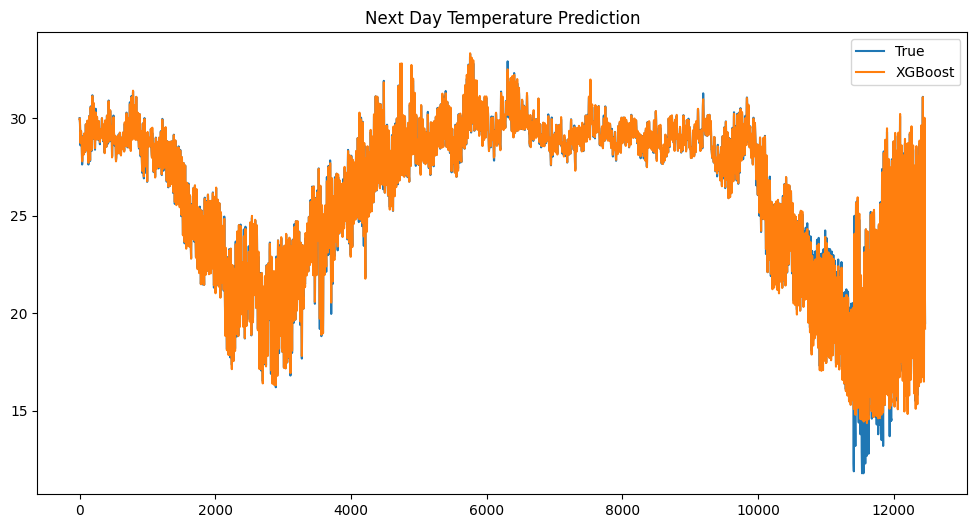

In [81]:
plt.figure(figsize=(12,6))

plt.plot(y_test.iloc[:,0].values, label="True")
plt.plot(xgb_pred[:,0], label="XGBoost")

plt.legend()
plt.title("Next Day Temperature Prediction")
plt.show()
